
# *NETFLIX* 

## <span style="color:green">Perform pre processing</span>
## <span style="color:green">Using</span>

## 1. Pandas
- **Purpose**: Data manipulation and analysis.
- **Functions for EDA**:
  - `df.describe()`: Summary statistics.
  - `df.info()`: Data types and missing values.
  - `df.isnull().sum()`: Count missing values.
  - `df.corr()`: Correlation matrix.
- **Installation**: `pip install pandas`

## 2. NumPy
- **Purpose**: Numerical operations.
- **Functions for EDA**:
  - `np.mean()`,`np.median()`, `np.std()`: Calculate basic statistics.
- **Installation**: `pip install numpy`
## 3. matplotlib & Seaborn
- **purpose**: Data visualization.

## 4. import warnings
 - **it helps suppress unnecessary warnings to keep the analysis output clean and focused.**






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [68]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Show shape

In [8]:
df.shape

(8807, 12)

## Find Information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Check the missing values

In [14]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [16]:
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

# fill the null values

In [19]:
df["director"]=df["director"].fillna(df["director"].mode()[0])

In [21]:
df["country"]=df["country"].fillna(df["country"].mode()[0])
df["cast"]=df["cast"].fillna(df["cast"].mode()[0])


In [23]:
df["rating"]=df["rating"].fillna(df["rating"].mode()[0])
df["duration"]=df["duration"].fillna(df["duration"].mode()[0])
df["date_added"]=df["date_added"].fillna(df["date_added"].mode()[0])

In [25]:
df.isnull().sum()/len(df)*100

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

# Rename Columns

In [28]:
df.rename(columns={"date_added":"year1"},inplace=True)

In [30]:
df.rename(columns={"listed_in":"genres"},inplace=True)

# Change Dtypes

In [33]:
df["year1"] = pd.to_datetime(df["year1"],errors="coerce")
df["date_added"] = df["year1"].dt.day
df["month_added"]=df["year1"].dt.month_name()
df["year_added"] = df["year1"].dt.year

In [35]:
df["date_added"]=df["date_added"].fillna(0).astype("int64")
df["year_added"]=df["year_added"].fillna(0).astype("int64")
df["month_added"]=df["month_added"].fillna(df["month_added"].mode()[0])

## Display the first few rows of the dataset to understand its structure.

In [38]:
df.head()

,show_id,type,title,director,cast,country,year1,release_year,rating,duration,genres,description,date_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,September,2021
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,September,2021
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,September,2021
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,September,2021


# Check dupliicates Values 

In [41]:
df.duplicated().sum()

np.int64(0)

# delete Columns

In [44]:
df.drop(columns="description",inplace=True)

In [46]:
df.to_csv("Netflix_Movies.csv")

# Chekiing unique Values

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   year1         8719 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  genres        8807 non-null   object        
 11  date_added    8807 non-null   int64         
 12  month_added   8807 non-null   object        
 13  year_added    8807 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 963.4+ KB


In [51]:
df["month_added"]=df["month_added"].fillna(df["month_added"].mode()[0])

In [53]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [55]:
countryList = set()

for country in df['country']:
    d = country.split(",")
    if len(d) > 1:
        for i in d:
            countryList.add(i.strip())
    else:
        countryList.add(country)

In [57]:
countryList

{'',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'East Germany',
 'Ecuador',
 'Egypt',
 'Ethiopia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Malta',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Nigeria',
 'Nor

In [86]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [87]:
df["month_added"].unique()

['September', 'August', 'July', 'June', 'May', ..., 'February', 'January', 'December', 'November', 'October']
Length: 12
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

In [88]:
df

,show_id,type,title,director,cast,country,year1,release_year,rating,duration,genres,date_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,25,September,2021-01-01
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",24,September,2021-01-01
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",24,September,2021-01-01
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",24,September,2021-01-01
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",24,September,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers",20,November,2019-01-01
8803,s8804,TV Show,Zombie Dumb,Rajiv Chilaka,David Attenborough,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",1,July,2019-01-01
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",1,November,2019-01-01
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies",11,January,2020-01-01


In [89]:
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=["rating","month_added"]      # Columns to encode (should be categorical)
for i in col:                     # Apply LabelEncoder only to categorical columns
   df[i]=le.fit_transform(df[i])


## Check and handling outliers

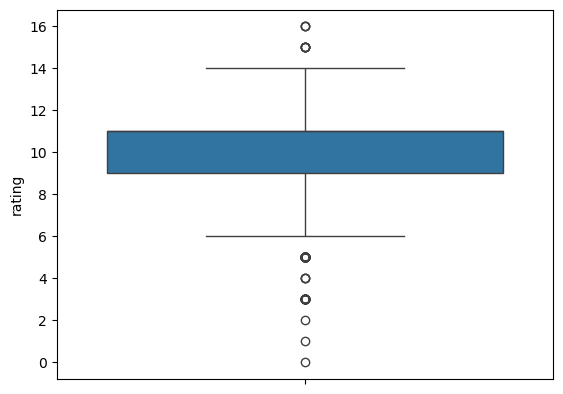

In [99]:
sns.boxplot(df['rating'])
plt.show()

In [101]:


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip values outside the bounds
df['rating'] = df['rating'].clip(lower=lower_bound, upper=upper_bound)




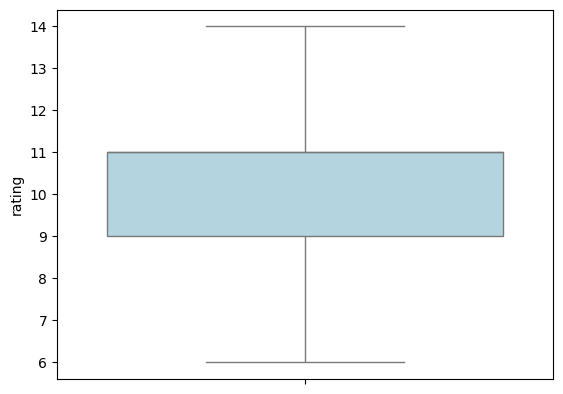

In [103]:
sns.boxplot(df['rating'],color="lightblue")
plt.show()

### Check correlation 

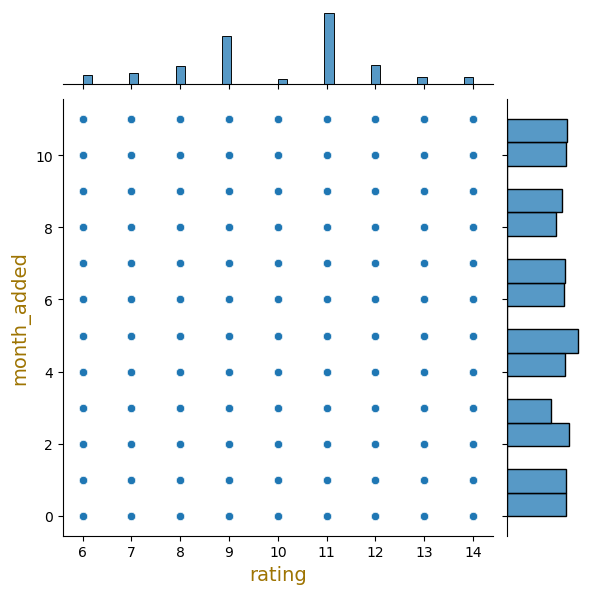

In [106]:
sns.jointplot(x="rating",y="month_added",data=df)

plt.xlabel("rating",fontsize=14,color="#9e7402")
plt.ylabel("month_added",fontsize=14,color="#9e7402")
plt.show()